In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
from testSilhouettes import *

In [2]:
image = cv2.imread("images/m509_outfile_4.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

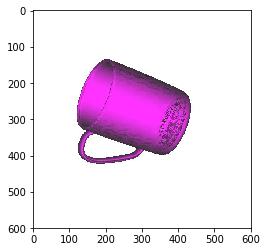

In [3]:
plt.imshow(image)
plt.show()

In [4]:
 edges = cv2.Canny(image,199,199)

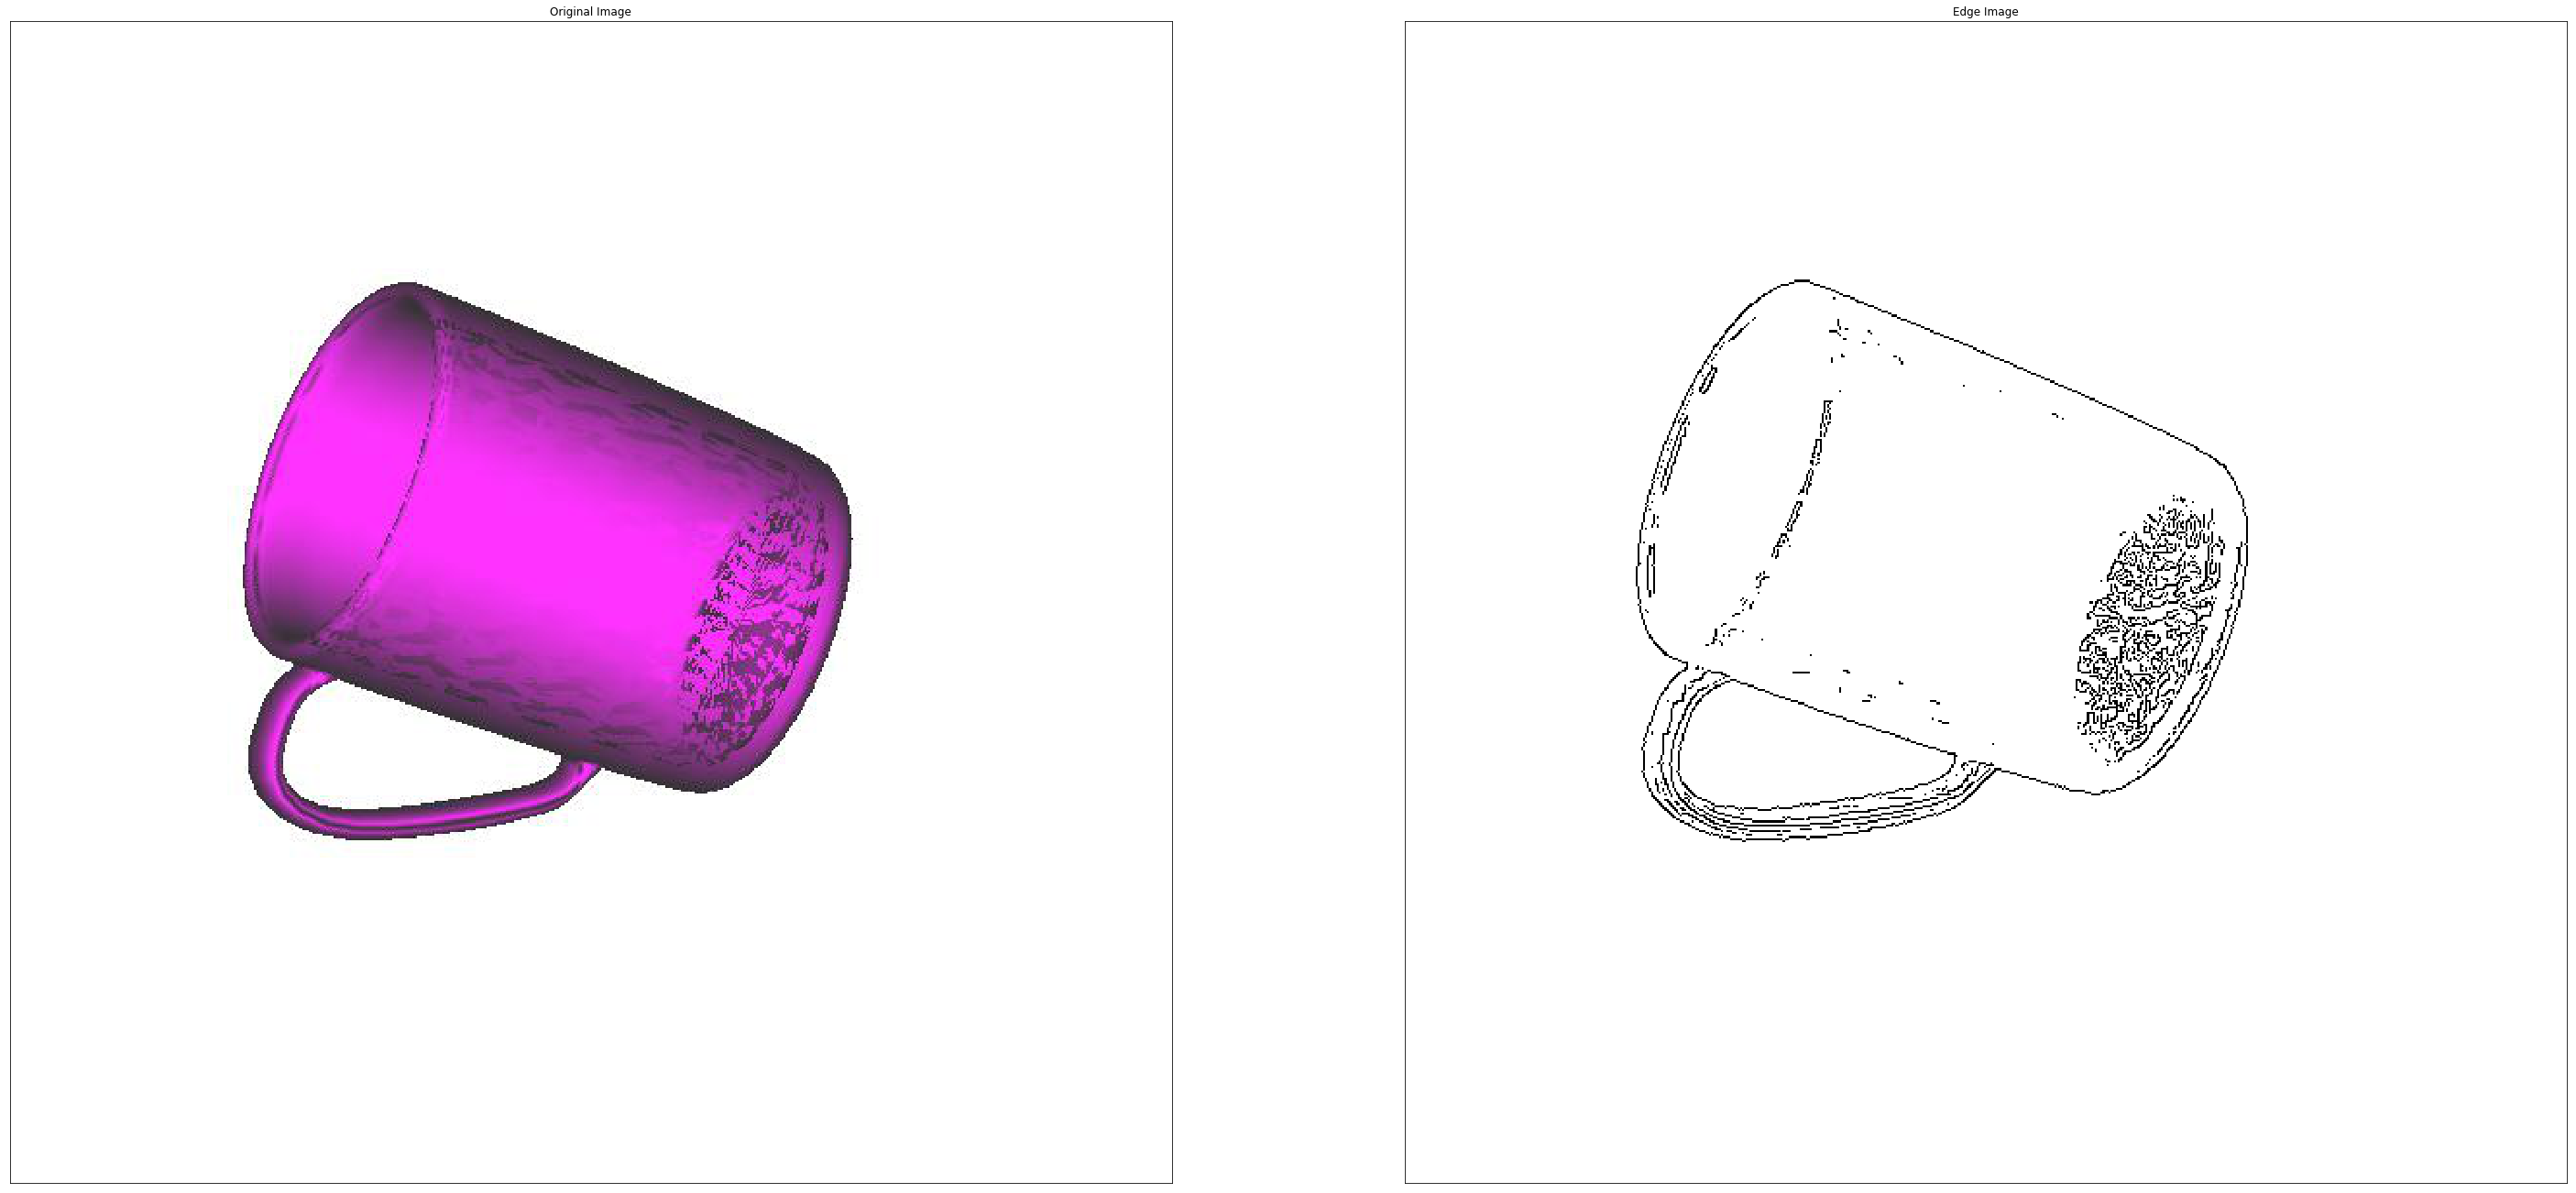

In [5]:
plt.figure(figsize=(50,50))
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(255-edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
def getGabor(u, v, w0 = 0.1, sigma_x = 5, sigma_y = 10):
    sigma_y = sigma_x/0.3
    theta = 1.*math.pi/4
    x = u* math.cos(theta)-v*math.sin(theta)
    y = u* math.sin(theta)+v*math.cos(theta)    
    res = math.exp(-2*(math.pi**2)*(((x-w0)**2)*sigma_x**2 + (y**2)*sigma_y**2))
    return res

In [7]:
def getGabor(u, v, w0 = 0.1, sigma_x = 0.5, sigma_y = 10):
    sigma_y = sigma_x/0.3
    theta = 6.*math.pi/8
    x = u* math.cos(theta)-v*math.sin(theta)
    y = u* math.sin(theta)+v*math.cos(theta)    
    res = math.exp(-2*(math.pi**2)*(((x-w0)**2)*sigma_x**2 + ((y)**2)*sigma_y**2))
    return res

In [14]:
im = np.zeros(edges.shape)
w = len(im)
for i in range(len(im)):
    u = 2*math.pi*i/len(im)
    #print(u)
    for j in range(len(im[0])):
        
        v = 2*math.pi*j/len(im)
        im[i][j] = getGabor(u, v, w0=0.13, sigma_x= 0.02*w)

In [15]:
np.sum(np.multiply(im, im))

1.8849430974020495e-42

/home/masha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


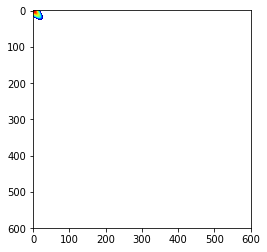

In [16]:
plt.imshow(np.log(im), cmap='jet')
plt.show()

In [17]:
changed = np.abs(np.fft.ifft(np.multiply(np.fft.fft(edges), im)))

TypeError: Image data cannot be converted to float

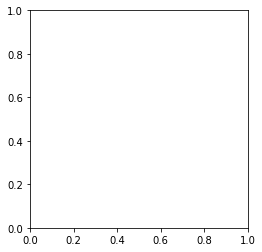

In [22]:
plt.imshow(10**47*changed)
plt.show()

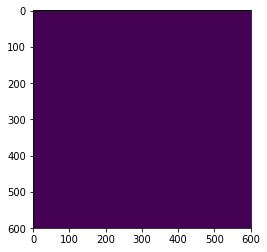

In [507]:
plt.imshow(np.abs(np.fft.ifft( im)))
plt.show()

In [508]:
f = np.fft.fft2(np.abs(image))